In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df= pd.read_csv(r'C:\Users\Saidakbar\Desktop\MACHINE LEARNIGN\end to end project\notebook\data\StudentsPerformance (1).csv')

In [3]:
X = df.drop(columns=['math score'],axis=1) 
y = df['math score']

In [4]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

processor = ColumnTransformer(
    [
        ('oh_transformer',oh_transformer,cat_features),
        ('standardscaler',numeric_transformer,num_features)
        
    ]
)


In [5]:
X = processor.fit_transform(X)


In [6]:
X

<1000x151 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [7]:
X.shape

(1000, 151)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [9]:
def evaulate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,mse,rmse,r2_square


In [11]:

models = {
    'Linear regression':LinearRegression(),
    'Lasso': Lasso(),
    'Ridge':Ridge(),
    'k-neigherst neighbour':KNeighborsRegressor(),
    'decision tree':XGBRegressor(),
    'Cat boost regressor':CatBoostRegressor(verbose=False),
    'adaboost regessor':AdaBoostRegressor()


}

model_list = []

r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mae_train, mse_train,rmse_train,r2_scoring_train = evaulate_model(y_train,y_train_pred)
    mae_test, mse_test,rmse_test,r2_scoring_test = evaulate_model(y_train,y_train_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('model performance for training set')
    print(f'root mean squared error:{rmse_train}')
    print(f'mean_absolute error {mae_train}')
    print(f'r2 score{r2_scoring_train}')
    print(20*'-')

    print('model performance for test set')

    
    print(f'root mean squared error:{rmse_test}')
    print(f'mean_absolute error {mae_test}')
    print(f'r2 score{r2_scoring_test}')
    print(20*'-')
    r2_list.append(r2_scoring_test)

    print(35*'=')
    print('\n')
    


Linear regression
model performance for training set
root mean squared error:7.590205832366099
mean_absolute error 6.108704876936499
r2 score0.7388304096540674
--------------------
model performance for test set
root mean squared error:7.590205832366099
mean_absolute error 6.108704876936499
r2 score0.7388304096540674
--------------------


Lasso
model performance for training set
root mean squared error:8.549653487469477
mean_absolute error 6.8679896571804795
r2 score0.6686305034373876
--------------------
model performance for test set
root mean squared error:8.549653487469477
mean_absolute error 6.8679896571804795
r2 score0.6686305034373876
--------------------


Ridge
model performance for training set
root mean squared error:7.655012464366698
mean_absolute error 6.2295068477777065
r2 score0.7343515381768134
--------------------
model performance for test set
root mean squared error:7.655012464366698
mean_absolute error 6.2295068477777065
r2 score0.7343515381768134
-----------------

c:\Users\Saidakbar\Desktop\MACHINE LEARNIGN\end to end project\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Saidakbar\Desktop\MACHINE LEARNIGN\end to end project\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Saidakbar\Desktop\MACHINE LEARNIGN\end to end project\venv\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Saidakbar\Desktop\MACHINE LEARNIGN\end to end project\venv\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Sa

k-neigherst neighbour
model performance for training set
root mean squared error:7.4069928349596
mean_absolute error 5.990857142857143
r2 score0.7512865050524073
--------------------
model performance for test set
root mean squared error:7.4069928349596
mean_absolute error 5.990857142857143
r2 score0.7512865050524073
--------------------


decision tree
model performance for training set
root mean squared error:5.060483441190201
mean_absolute error 3.615949159349714
r2 score0.8839087419849143
--------------------
model performance for test set
root mean squared error:5.060483441190201
mean_absolute error 3.615949159349714
r2 score0.8839087419849143
--------------------


Cat boost regressor
model performance for training set
root mean squared error:6.116367836455509
mean_absolute error 4.9690300659391236
r2 score0.8304090422093389
--------------------
model performance for test set
root mean squared error:6.116367836455509
mean_absolute error 4.9690300659391236
r2 score0.83040904220933

In [14]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model name','r2_score']).sort_values(by=['r2_score'],ascending=False)

,model name,r2_score
4,decision tree,0.883909
5,Cat boost regressor,0.830409
3,k-neigherst neighbour,0.751287
0,Linear regression,0.738830
2,Ridge,0.734352
6,adaboost regessor,0.695396
1,Lasso,0.668631


In [15]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print(f'score is {score}')

score is 58.11034410366284


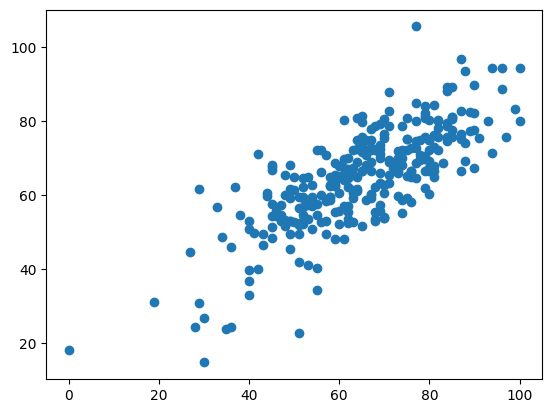

In [16]:
plt.scatter(y_test,y_pred)


<Axes: xlabel='math score'>

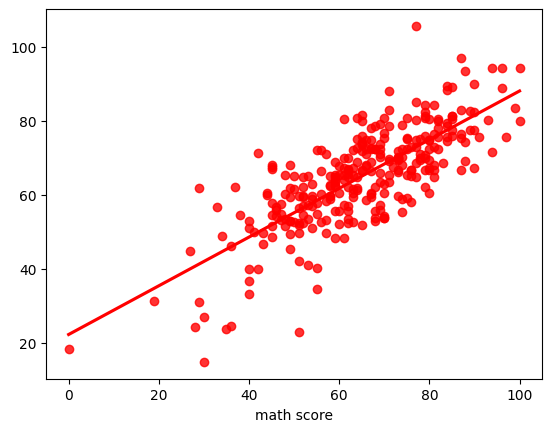

In [17]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')